# WeatherPy
----
### Jake Burns


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url from open weather doc site
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#url = 'api.openweathermap.org/data/2.5/weather?'
url =  'http://api.openweathermap.org/data/2.5/weather?'
#print(url)

#test city London
#city_name= 'London'
# query_url = f'{url}q={city_name}&appid={api_key}'

# #get response-- add json to end to automatically call json
# response = requests.get(query_url)
# response_json= response.json()


#print(json.dumps(response_json, indent=4, sort_keys=True))

In [4]:
# Loop through each city

#empty lists to fill
lat= []
lon= []
temp_max= []
humidity= []
cloudiness= []
wind_speed= []
city_list= []
country_list= []
date_list = []


for city in cities:
    
    query_url = f'{url}q={city}&units=imperial&appid={api_key}'

    #get response-- add json to end to automatically call json
    response = requests.get(query_url)
    response_json= response.json()

    
    # Try to grab the lat, lon, Max Temperature, Humidty%, cloudiness, wind speed
    try:
        lat.append(response_json['coord']['lat'])
        lon.append(response_json['coord']['lon'])
        temp_max.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country_list.append(response_json['sys']['country'])
        date_list.append(response_json['dt'])
        city_list.append(city)
        print(f"{city} found! Appending stats")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found... Skipping... ")
        pass

ancud found! Appending stats
talcahuano found! Appending stats
okhotsk found! Appending stats
ushuaia found! Appending stats
saint-philippe found! Appending stats
atambua found! Appending stats
busselton found! Appending stats
vanavara found! Appending stats
ternate found! Appending stats
vaini found! Appending stats
hermanus found! Appending stats
wanning found! Appending stats
georgetown found! Appending stats
port alfred found! Appending stats
punta arenas found! Appending stats
cape town found! Appending stats
qaanaaq found! Appending stats
torbay found! Appending stats
netrakona found! Appending stats
araouane found! Appending stats
butaritari found! Appending stats
mahebourg found! Appending stats
madingou found! Appending stats
luebo found! Appending stats
bilma found! Appending stats
sitka found! Appending stats
kapaa found! Appending stats
victoria found! Appending stats
lagoa found! Appending stats
russell found! Appending stats
cherskiy found! Appending stats
hofn found! App

In [5]:
#test to see how many cities found:
len(lat)

542

In [6]:
# create DataFrame
weather_df = pd.DataFrame({
    'City': city_list,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': temp_max,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country_list,
    'Date': date_list
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,55.99,94,90,17.27,CL,1619813295
1,talcahuano,-36.7167,-73.1167,60.80,77,90,17.27,CL,1619813295
2,okhotsk,59.3833,143.3000,30.69,80,100,4.65,RU,1619813295
3,ushuaia,-54.8000,-68.3000,41.00,81,75,4.61,AR,1619813261
4,saint-philippe,-21.3585,55.7679,75.20,83,0,5.75,RE,1619813296
...,...,...,...,...,...,...,...,...,...
537,kailua,21.4022,-157.7394,80.60,73,90,11.50,US,1619813405
538,ahmadpur,18.7000,76.9333,86.56,31,69,7.34,IN,1619813405
539,road town,18.4167,-64.6167,82.40,65,40,10.36,VG,1619813149
540,dedza,-14.3779,34.3332,58.57,88,5,1.97,MW,1619813405


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
test= weather_df.loc[weather_df['Humidity'] > 100]
test

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# The path to our CSV file
# file = "../Instructions/output_data/cities.csv"

# # Read our Kickstarter data into pandas
# city_df = pd.read_csv(file)
# city_df.head()

In [11]:
#Export DF as csv file
weather_df.to_csv('weather_data.csv', index=False)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

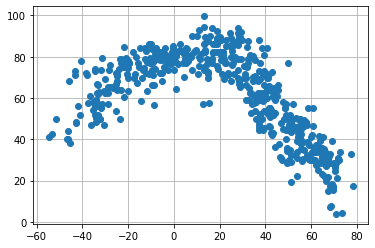

In [13]:
#plot line plot
fig1, ax1 = plt.subplots()

x_latitude= weather_df['Lat']
y_temperature= weather_df['Max Temp']

# ax3.set_xlabel('Weight (g)')
# ax3.set_ylabel('Tumor Volume (mm3)')
# ax3.set_title('Observing Weight vs Avg Tumor Volume with Capomulin Treatment')

# #limits
# plt.xlim(13, (x_weight.max()+1).item())
# plt.ylim(32, (y_volume.max()+2).item())

ax1.plot(x_latitude, y_temperature, 'o')

# Set a grid on the plot
plt.grid()


plt.show()

## Latitude vs. Humidity Plot

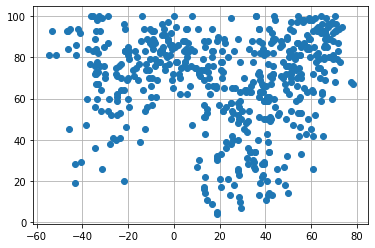

In [14]:
#plot line plot
fig2, ax2 = plt.subplots()

x_latitude= weather_df['Lat']
y_humidity= weather_df['Humidity']

# ax3.set_xlabel('Weight (g)')
# ax3.set_ylabel('Tumor Volume (mm3)')
# ax3.set_title('Observing Weight vs Avg Tumor Volume with Capomulin Treatment')

# #limits
# plt.xlim(13, (x_weight.max()+1).item())
# plt.ylim(32, (y_volume.max()+2).item())

ax2.plot(x_latitude, y_humidity, 'o')

# Set a grid on the plot
plt.grid()


plt.show()

## Latitude vs. Cloudiness Plot

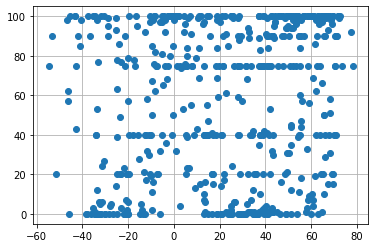

In [16]:
#plot line plot
fig3, ax3 = plt.subplots()

x_latitude= weather_df['Lat']
y_cloudiness= weather_df['Cloudiness']

# ax3.set_xlabel('Weight (g)')
# ax3.set_ylabel('Tumor Volume (mm3)')
# ax3.set_title('Observing Weight vs Avg Tumor Volume with Capomulin Treatment')

# #limits
# plt.xlim(13, (x_weight.max()+1).item())
# plt.ylim(32, (y_volume.max()+2).item())

ax3.plot(x_latitude, y_cloudiness, 'o')

# Set a grid on the plot
plt.grid()


plt.show()

## Latitude vs. Wind Speed Plot

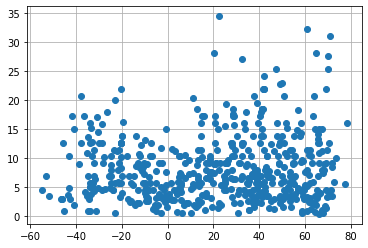

In [17]:
#plot line plot
fig4, ax4 = plt.subplots()

x_latitude= weather_df['Lat']
y_wind= weather_df['Wind Speed']

# ax3.set_xlabel('Weight (g)')
# ax3.set_ylabel('Tumor Volume (mm3)')
# ax3.set_title('Observing Weight vs Avg Tumor Volume with Capomulin Treatment')

# #limits
# plt.xlim(13, (x_weight.max()+1).item())
# plt.ylim(32, (y_volume.max()+2).item())

ax4.plot(x_latitude, y_wind, 'o')

# Set a grid on the plot
plt.grid()


plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression